In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import math

import warnings

warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
df = pd.read_csv("../artifacts/raw/data.csv")

### 📌 Dataset Overview

In [13]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  \
0  2024-01-01 00:00:00          39           Idle      74.137590   
1  2024-01-01 00:01:00          29         Active      84.264558   
2  2024-01-01 00:02:00          15         Active      44.280102   
3  2024-01-01 00:03:00          43         Active      40.568502   
4  2024-01-01 00:04:00           8           Idle      75.063817   

   Vibration_Hz  Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0      3.500595              8.612162           10.650542       0.207764   
1      3.355928              2.268559           29.111810       2.228464   
2      2.079766              6.144105           18.357292       1.639416   
3      0.298238              4.067825           29.153629       1.161021   
4      0.345810              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  
0                      0.344650     14.965470               Low  
1                      0.769848      7.678270               Low  
2                      0.987086      8.198391               Low  
3                      0.983390      2.740847            Medium  
4                      0.573117     12.100686               Low

In [5]:
# Shape
df.shape

(100000, 13)

In [10]:
# Columns
df.columns

Index(['Timestamp', 'Machine_ID', 'Operation_Mode', 'Temperature_C',
       'Vibration_Hz', 'Power_Consumption_kW', 'Network_Latency_ms',
       'Packet_Loss_%', 'Quality_Control_Defect_Rate_%',
       'Production_Speed_units_per_hr', 'Predictive_Maintenance_Score',
       'Error_Rate_%', 'Efficiency_Status'],
      dtype='object')

In [11]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Timestamp                      100000 non-null  object 
 1   Machine_ID                     100000 non-null  int64  
 2   Operation_Mode                 100000 non-null  object 
 3   Temperature_C                  100000 non-null  float64
 4   Vibration_Hz                   100000 non-null  float64
 5   Power_Consumption_kW           100000 non-null  float64
 6   Network_Latency_ms             100000 non-null  float64
 7   Packet_Loss_%                  100000 non-null  float64
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64
 9   Production_Speed_units_per_hr  100000 non-null  float64
 10  Predictive_Maintenance_Score   100000 non-null  float64
 11  Error_Rate_%                   100000 non-null  float64
 12  Efficiency_Status              

In [ ]:
df.describe(include="all").T

count  unique                  top   freq  \
Timestamp                        100000  100000  2024-03-10 10:23:00      1   
Machine_ID                     100000.0     NaN                  NaN    NaN   
Operation_Mode                   100000       3               Active  70054   
Temperature_C                  100000.0     NaN                  NaN    NaN   
Vibration_Hz                   100000.0     NaN                  NaN    NaN   
Power_Consumption_kW           100000.0     NaN                  NaN    NaN   
Network_Latency_ms             100000.0     NaN                  NaN    NaN   
Packet_Loss_%                  100000.0     NaN                  NaN    NaN   
Quality_Control_Defect_Rate_%  100000.0     NaN                  NaN    NaN   
Production_Speed_units_per_hr  100000.0     NaN                  NaN    NaN   
Predictive_Maintenance_Score   100000.0     NaN                  NaN    NaN   
Error_Rate_%                   100000.0     NaN                  NaN    NaN   
Efficiency_Status                100000       3                  Low  77825   

                                     mean         std        min         25%  \
Timestamp                             NaN         NaN        NaN         NaN   
Machine_ID                       25.49933   14.389439        1.0        13.0   
Operation_Mode                        NaN         NaN        NaN         NaN   
Temperature_C                   60.041458   17.323238  30.000138   45.031596   
Vibration_Hz                     2.549959    1.414127   0.100011    1.323214   
Power_Consumption_kW             5.745929    2.451271   1.500183    3.627318   
Network_Latency_ms               25.55562   14.120758   1.000025   13.355118   
Packet_Loss_%                    2.493418    1.443273   0.000026    1.245026   
Quality_Control_Defect_Rate_%    5.008806    2.883666   0.000449    2.521591   
Production_Speed_units_per_hr  275.916324  130.096892  50.000375  162.873618   
Predictive_Maintenance_Score     0.499385    0.288814   0.000003    0.248166   
Error_Rate_%                       7.5041    4.335896   0.000112    3.750148   
Efficiency_Status                     NaN         NaN        NaN         NaN   

                                      50%         75%         max  
Timestamp                             NaN         NaN         NaN  
Machine_ID                           25.0        38.0        50.0  
Operation_Mode                        NaN         NaN         NaN  
Temperature_C                   60.033597   74.967217   89.998979  
Vibration_Hz                     2.549441    3.776459    4.999974  
Power_Consumption_kW              5.75546    7.860267    9.999889  
Network_Latency_ms              25.536079   37.796372   49.999917  
Packet_Loss_%                    2.487667    3.741252    4.999975  
Quality_Control_Defect_Rate_%    5.003569    7.506127      9.9999  
Production_Speed_units_per_hr  276.648922  388.812761  499.996768  
Predictive_Maintenance_Score     0.499209     0.74881    0.999978  
Error_Rate_%                     7.504145   11.273189   14.999869  
Efficiency_Status                     NaN         NaN         NaN

In [15]:
df.isnull().sum()

Timestamp                        0
Machine_ID                       0
Operation_Mode                   0
Temperature_C                    0
Vibration_Hz                     0
Power_Consumption_kW             0
Network_Latency_ms               0
Packet_Loss_%                    0
Quality_Control_Defect_Rate_%    0
Production_Speed_units_per_hr    0
Predictive_Maintenance_Score     0
Error_Rate_%                     0
Efficiency_Status                0
dtype: int64

### 🧮 Feature Types

In [16]:
df.dtypes

Timestamp                         object
Machine_ID                         int64
Operation_Mode                    object
Temperature_C                    float64
Vibration_Hz                     float64
Power_Consumption_kW             float64
Network_Latency_ms               float64
Packet_Loss_%                    float64
Quality_Control_Defect_Rate_%    float64
Production_Speed_units_per_hr    float64
Predictive_Maintenance_Score     float64
Error_Rate_%                     float64
Efficiency_Status                 object
dtype: object

🎯 Target Variable: Efficiency_Status

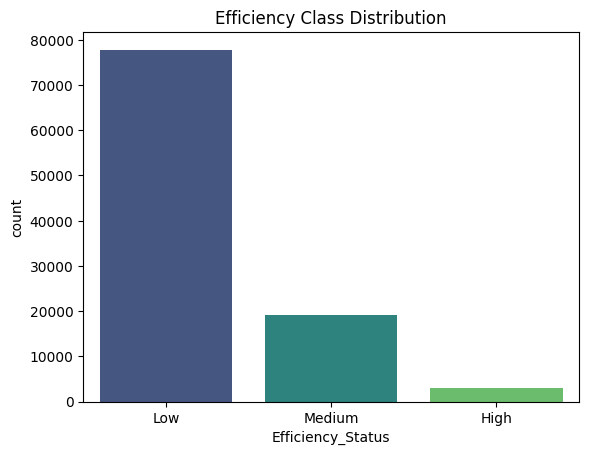

In [ ]:
sns.countplot(data=df, x="Efficiency_Status", palette="viridis")
plt.title("Efficiency Class Distribution")
plt.show()

### ⚙️ Operation Mode Distribution

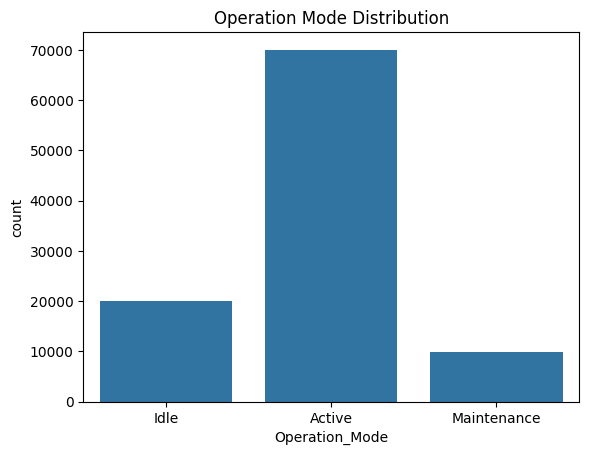

In [ ]:
sns.countplot(data=df, x="Operation_Mode")
plt.title("Operation Mode Distribution")
plt.show()

### Correlation Heatmap (Numeric Features)

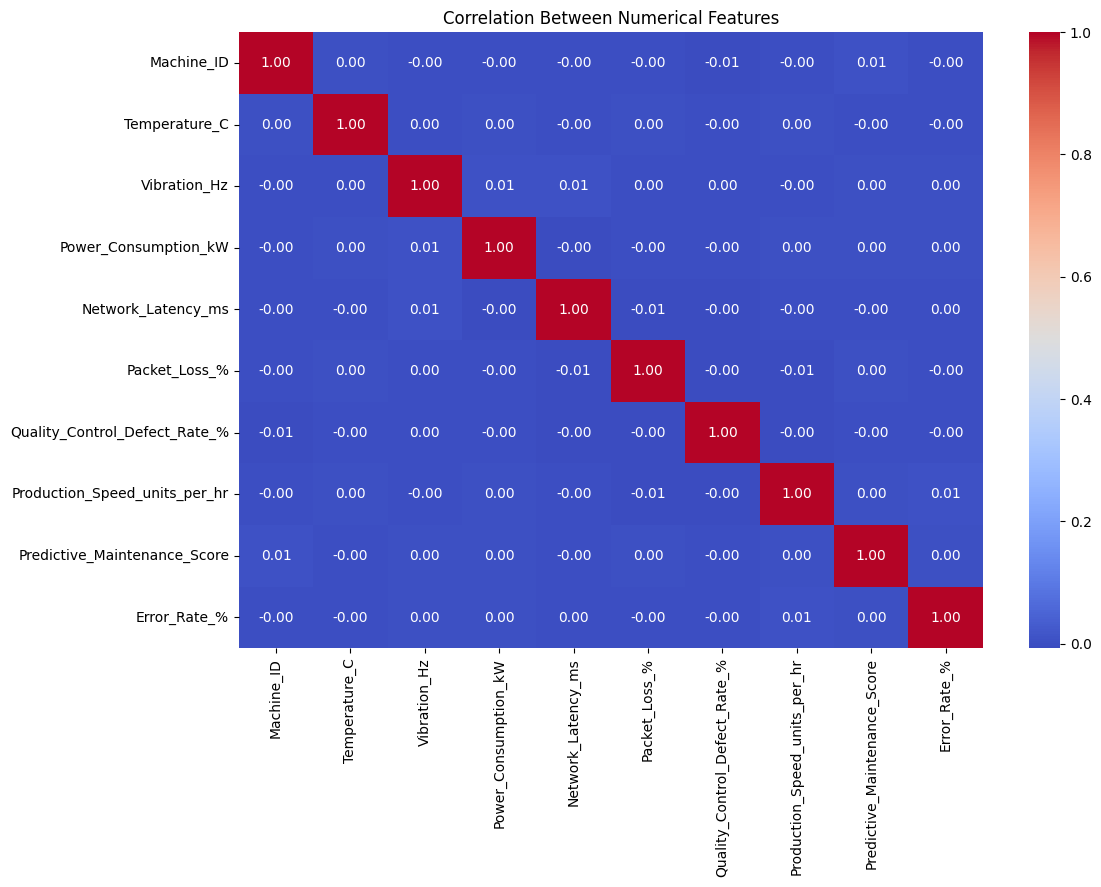

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.select_dtypes(include="number").corr(), annot=True, fmt=".2f", cmap="coolwarm"
)
plt.title("Correlation Between Numerical Features")
plt.show()

#### 🔍 Pairwise Feature Relationships (Sample)

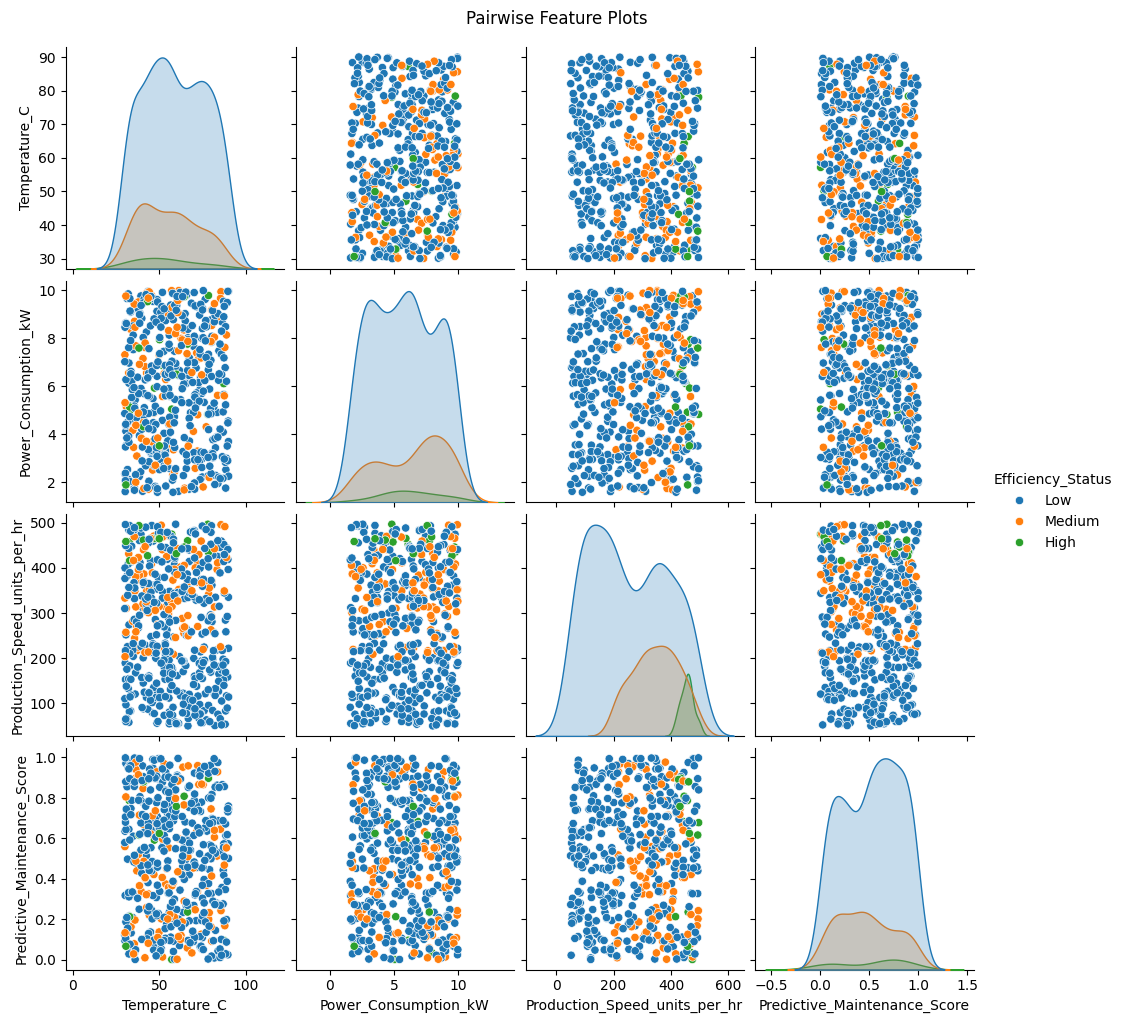

In [ ]:
sample_df = df.sample(500, random_state=42)
sns.pairplot(
    sample_df[
        [
            "Temperature_C",
            "Power_Consumption_kW",
            "Production_Speed_units_per_hr",
            "Predictive_Maintenance_Score",
            "Efficiency_Status",
        ]
    ],
    hue="Efficiency_Status",
)
plt.suptitle("Pairwise Feature Plots", y=1.02)
plt.show()

### 📦 Efficiency vs Numeric Features (Boxplots)

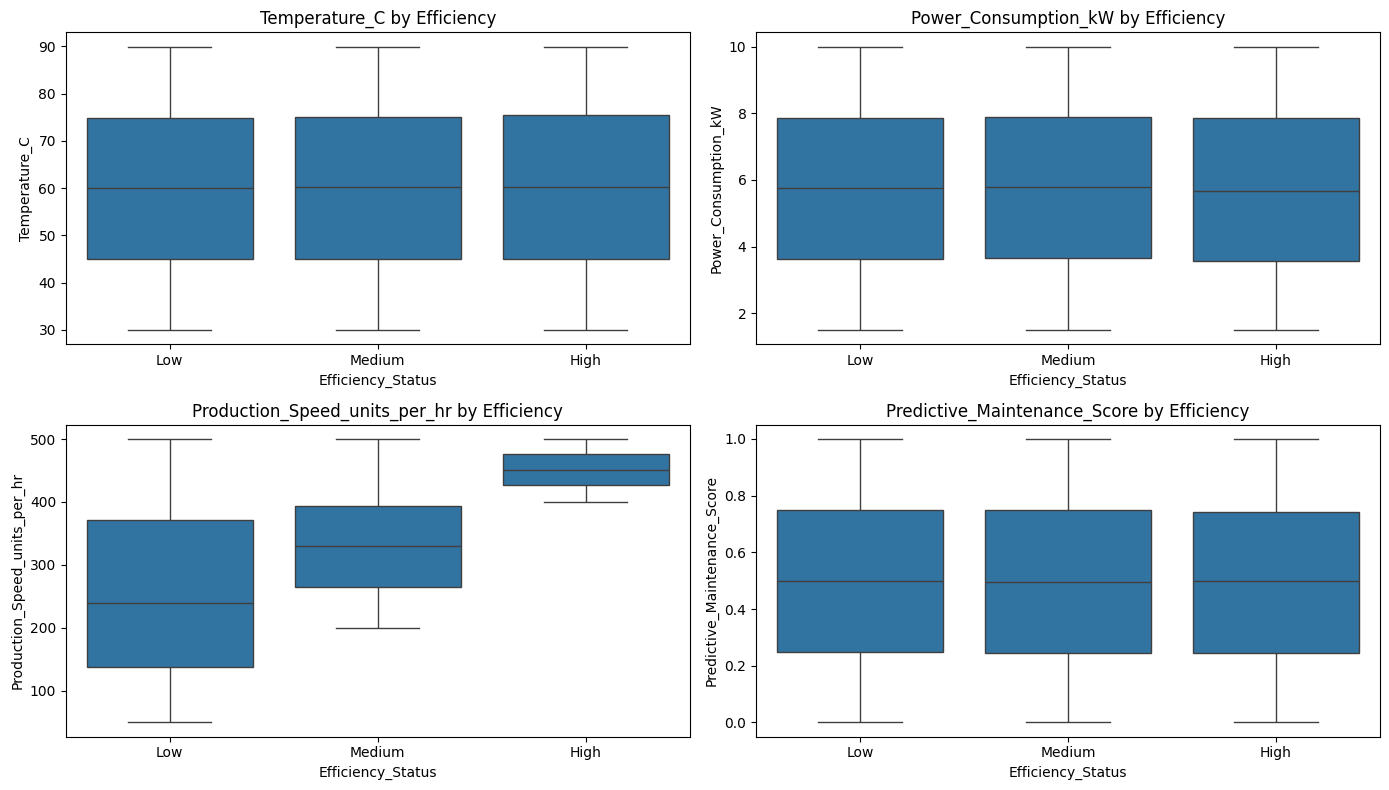

In [ ]:
features = [
    "Temperature_C",
    "Power_Consumption_kW",
    "Production_Speed_units_per_hr",
    "Predictive_Maintenance_Score",
]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
axs = axs.flatten()

for i, col in enumerate(features):
    sns.boxplot(data=df, x="Efficiency_Status", y=col, ax=axs[i])
    axs[i].set_title(f"{col} by Efficiency")
plt.tight_layout()
plt.show()

### 🚨 Outlier Detection

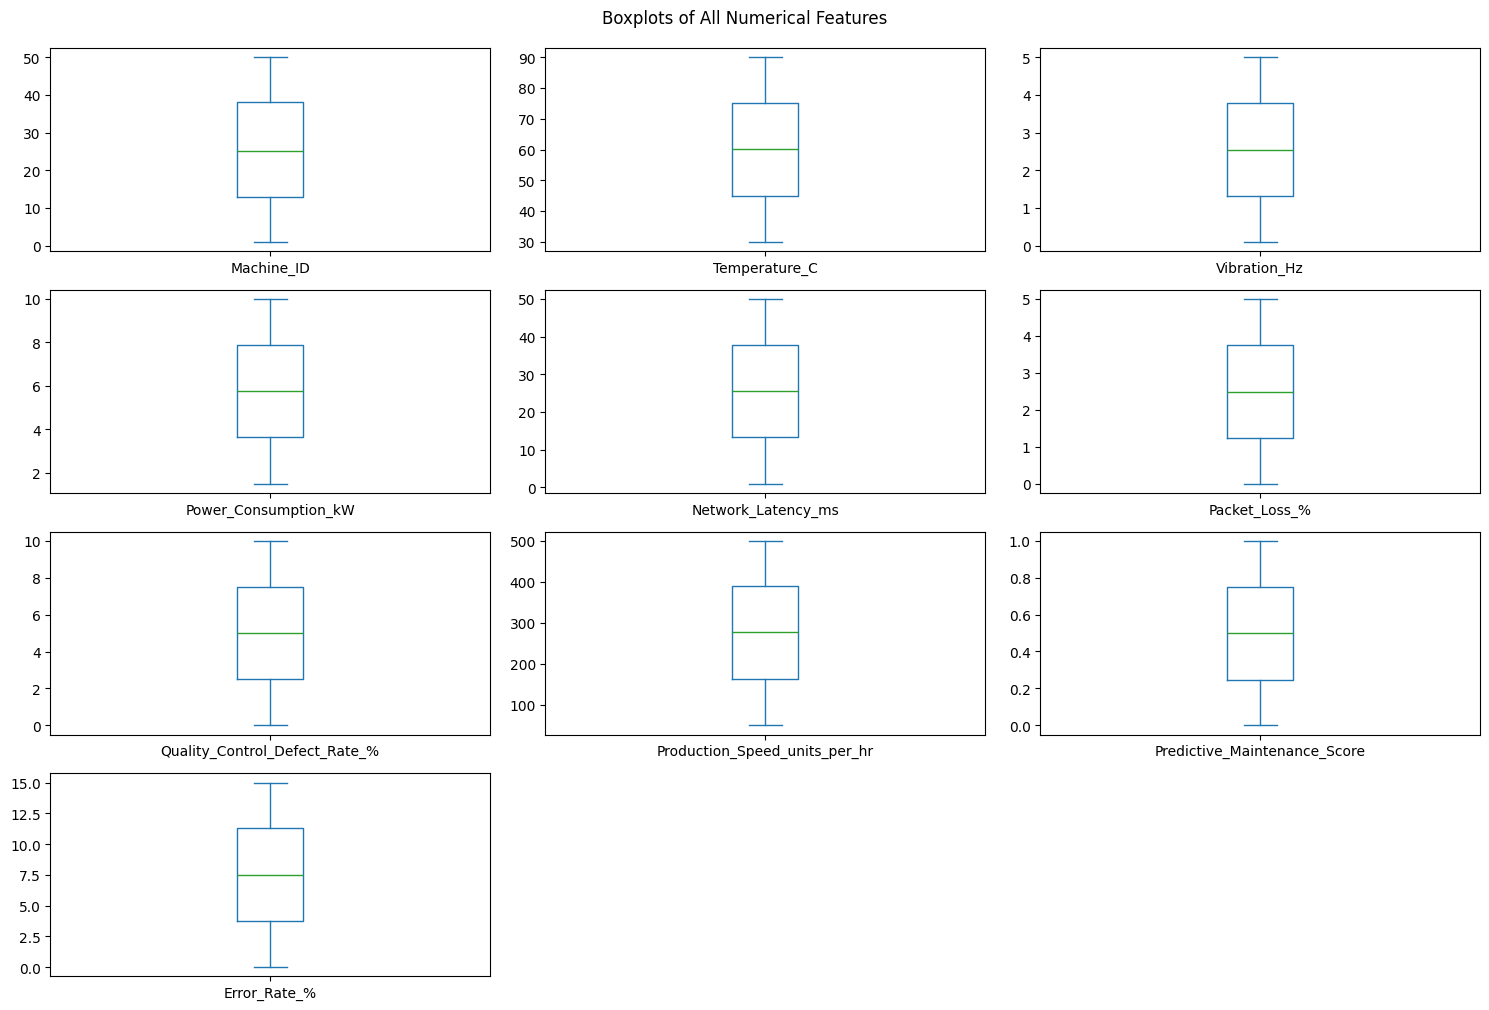

In [ ]:
numeric_cols = df.select_dtypes(include="number").columns
df[numeric_cols].plot(
    kind="box",
    subplots=True,
    layout=(5, 3),
    figsize=(15, 12),
    sharex=False,
    sharey=False,
)
plt.tight_layout()
plt.suptitle("Boxplots of All Numerical Features", y=1.02)
plt.show()

In [ ]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

In [ ]:
categorical_cols = ["Operation_Mode", "Efficiency_Status"]
for col in categorical_cols:
    df[col] = df[col].astype("category")

In [25]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

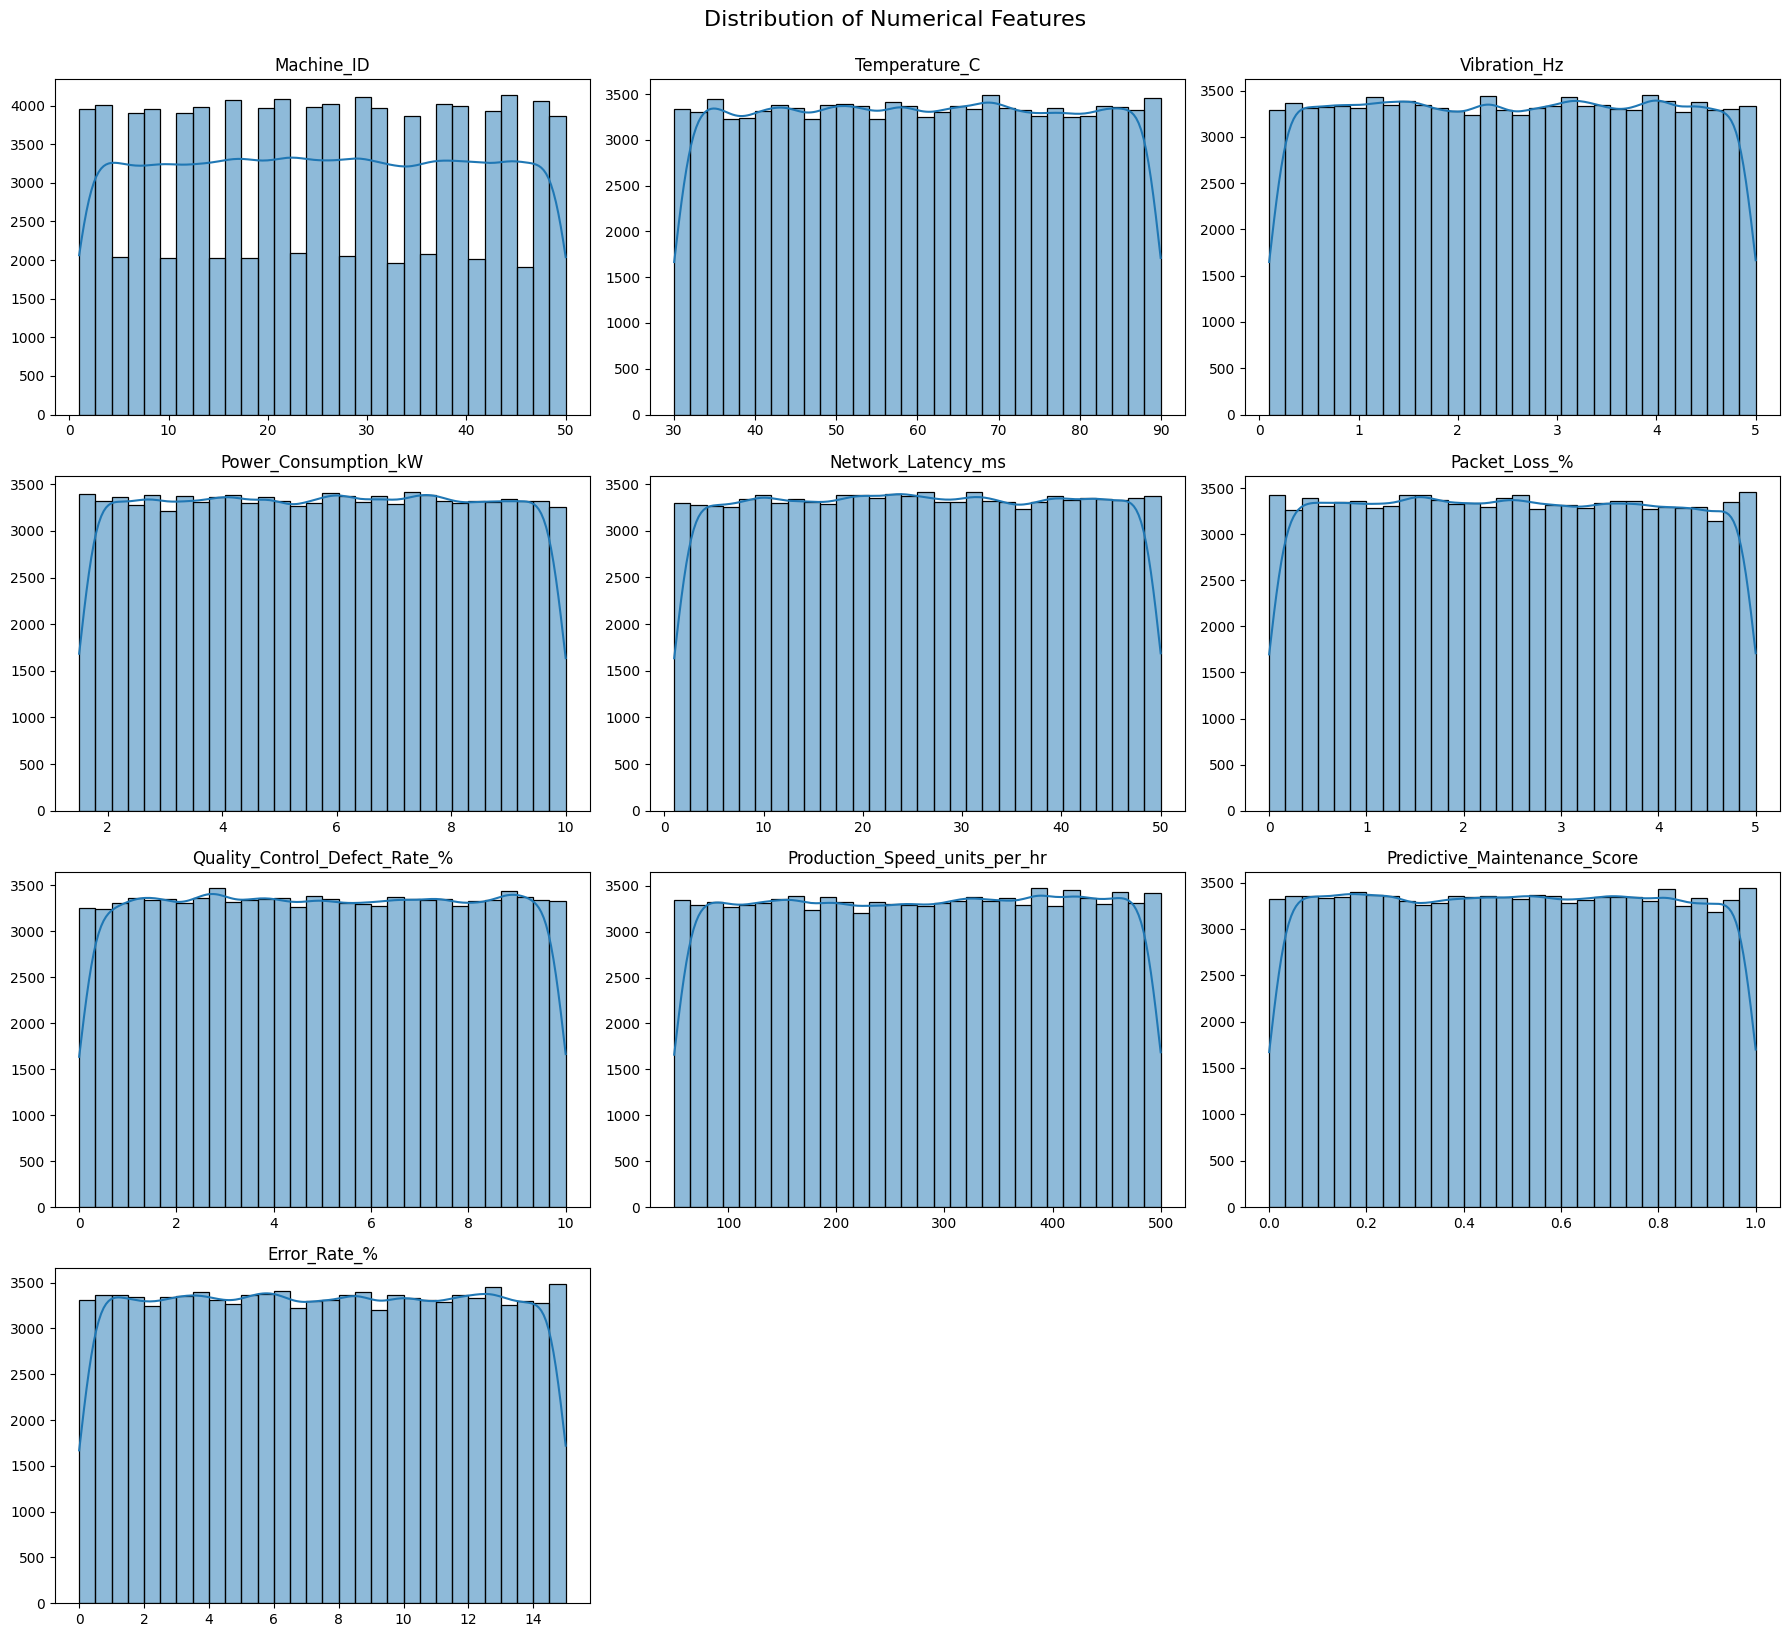

In [ ]:
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(n_cols * 6, n_rows * 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col}")
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.suptitle("Distribution of Numerical Features", fontsize=16, y=1.02)
plt.show()

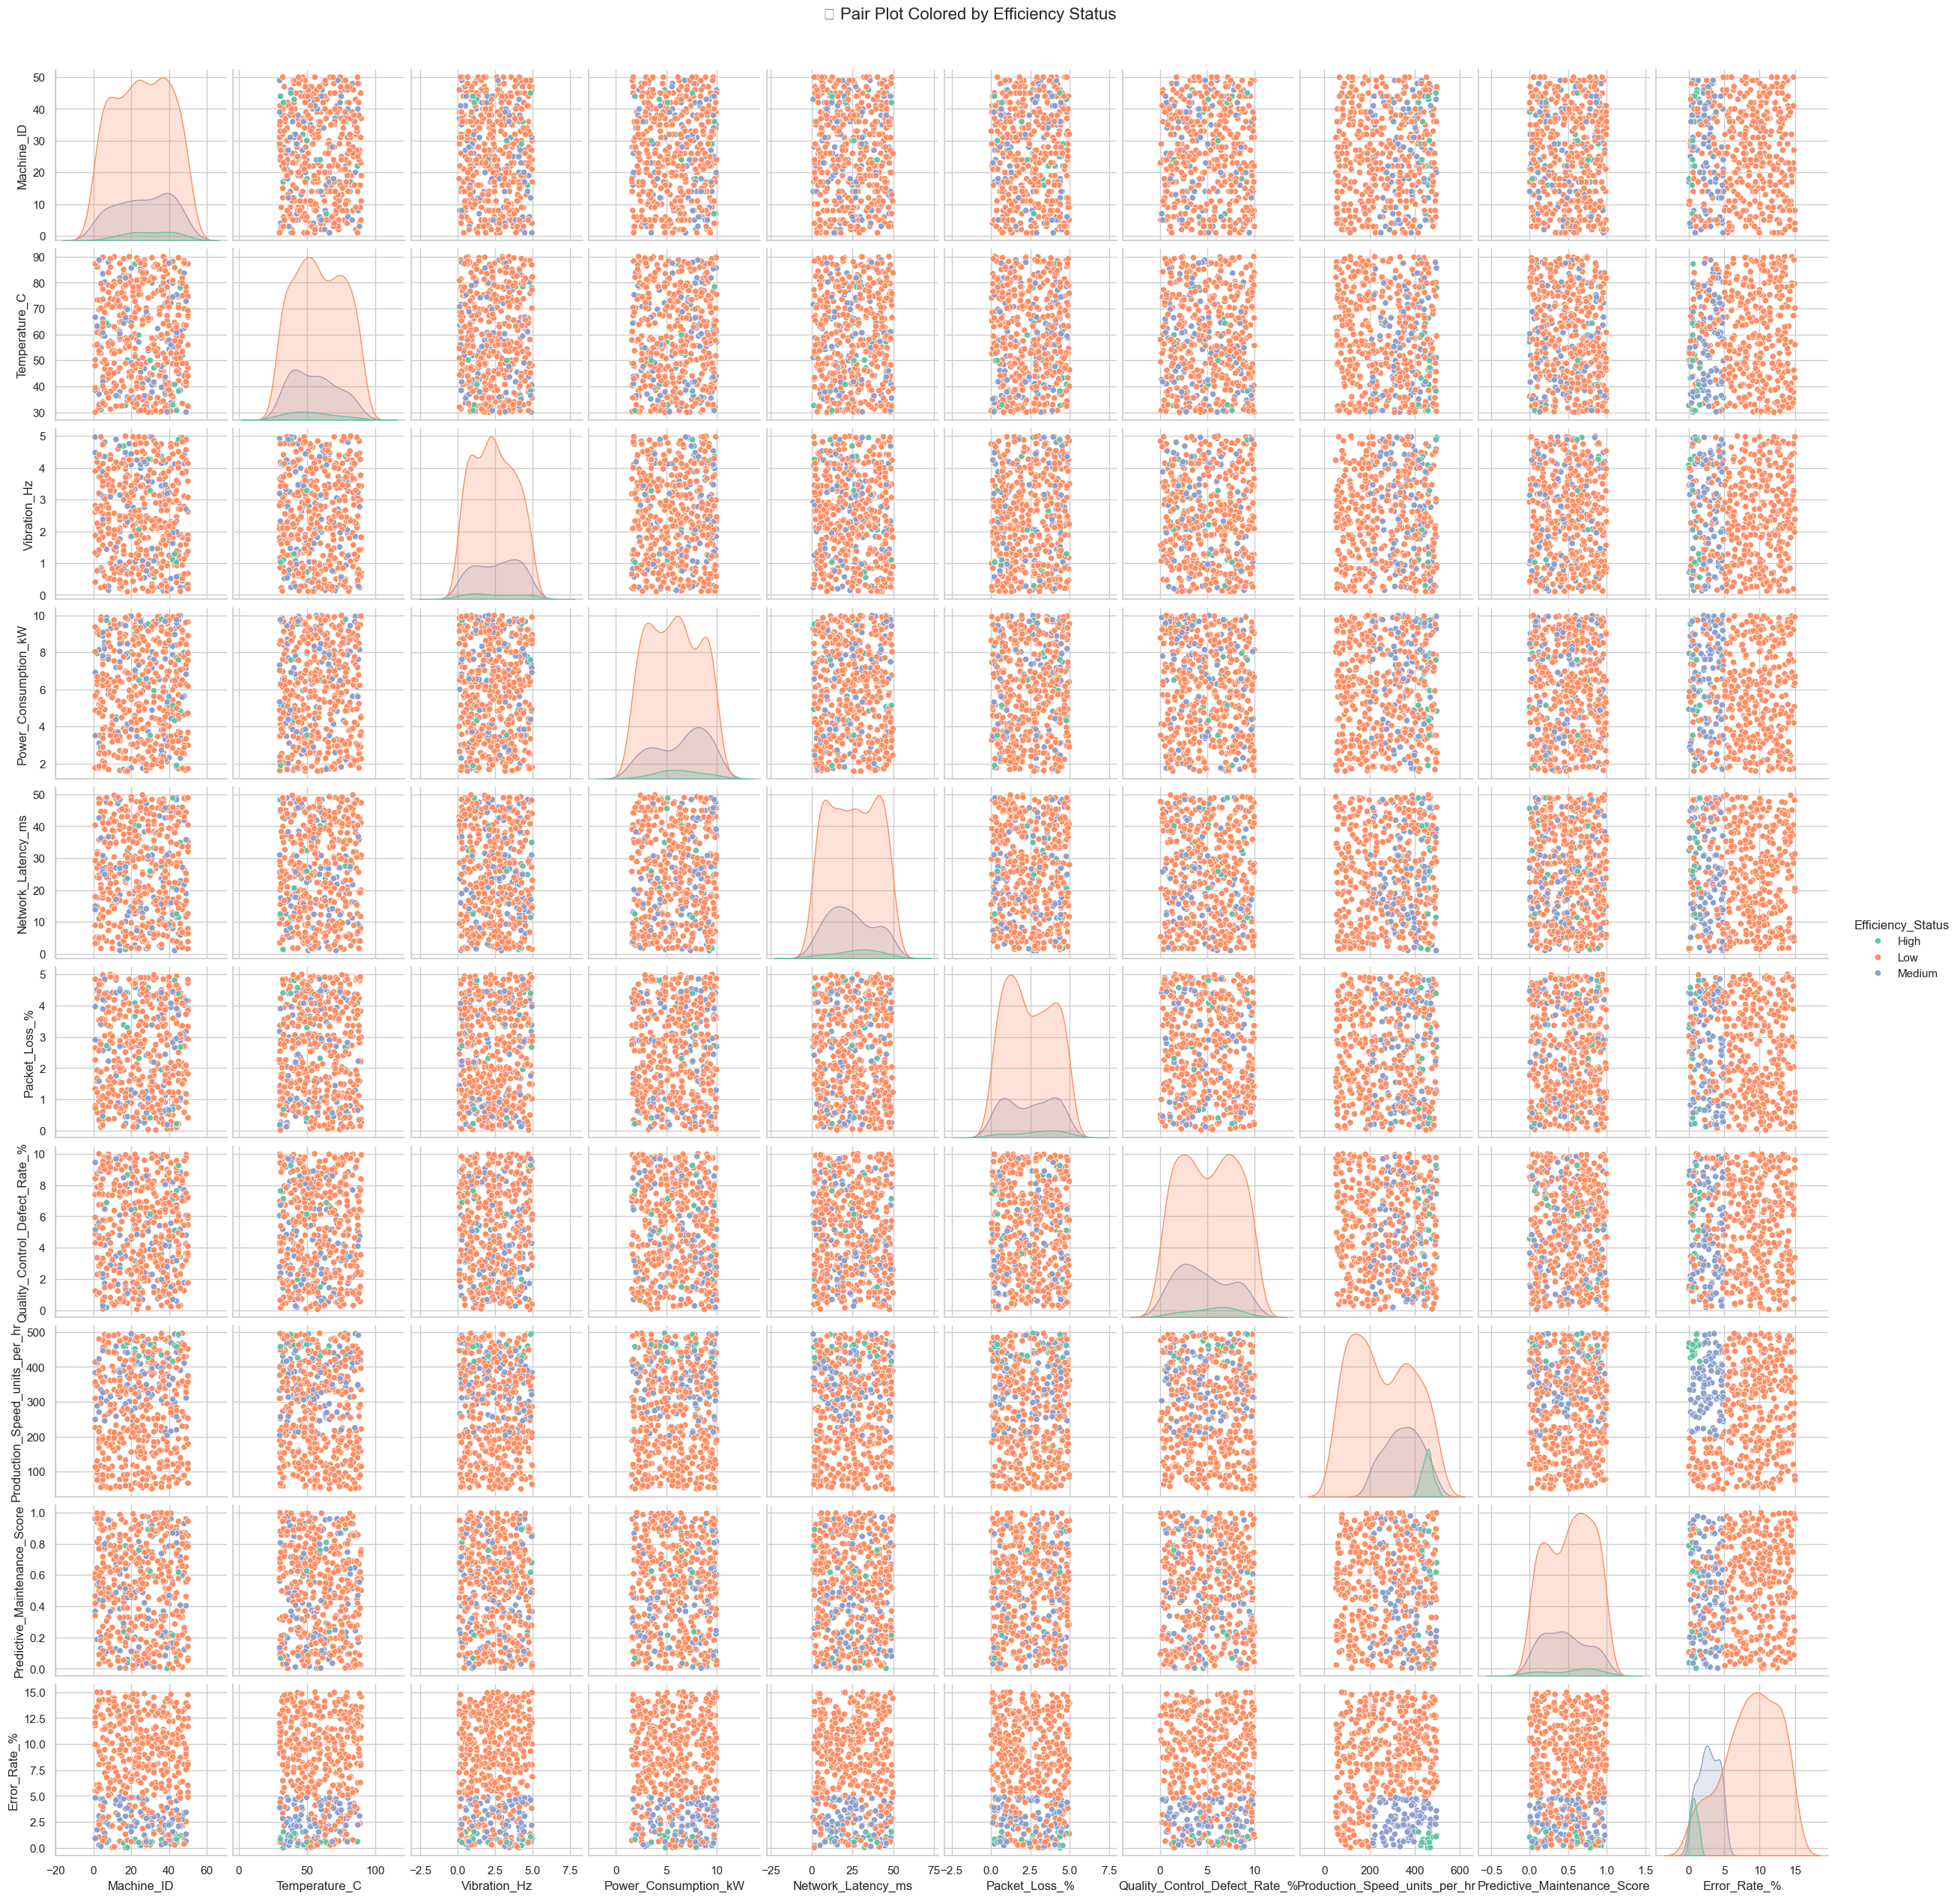

In [ ]:
# Sample data with target variable included
sample_df = df.sample(500, random_state=42)

# Plot pairplot with hue for target classes
pair = sns.pairplot(
    sample_df[numeric_cols + ["Efficiency_Status"]],
    hue="Efficiency_Status",
    palette="Set2",
)

# Title
pair.fig.suptitle("📊 Pair Plot Colored by Efficiency Status", y=1.02, fontsize=16)
plt.show()


### Feature Engineering

In [31]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  Vibration_Hz  \
0 2024-01-01 00:00:00          39           Idle      74.137590      3.500595   
1 2024-01-01 00:01:00          29         Active      84.264558      3.355928   
2 2024-01-01 00:02:00          15         Active      44.280102      2.079766   
3 2024-01-01 00:03:00          43         Active      40.568502      0.298238   
4 2024-01-01 00:04:00           8           Idle      75.063817      0.345810   

   Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0              8.612162           10.650542       0.207764   
1              2.268559           29.111810       2.228464   
2              6.144105           18.357292       1.639416   
3              4.067825           29.153629       1.161021   
4              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  
0                      0.344650     14.965470               Low  
1                      0.769848      7.678270               Low  
2                      0.987086      8.198391               Low  
3                      0.983390      2.740847            Medium  
4                      0.573117     12.100686               Low

In [32]:
# Extract year from timestamp
df["Year"] = df["Timestamp"].dt.year

# Extract month from timestamp
df["Month"] = df["Timestamp"].dt.month

# Extract day from timestamp
df["Day"] = df["Timestamp"].dt.day

# Extract hour from timestamp (useful for shift-based analysis)
df["Hour"] = df["Timestamp"].dt.hour

In [33]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  Vibration_Hz  \
0 2024-01-01 00:00:00          39           Idle      74.137590      3.500595   
1 2024-01-01 00:01:00          29         Active      84.264558      3.355928   
2 2024-01-01 00:02:00          15         Active      44.280102      2.079766   
3 2024-01-01 00:03:00          43         Active      40.568502      0.298238   
4 2024-01-01 00:04:00           8           Idle      75.063817      0.345810   

   Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0              8.612162           10.650542       0.207764   
1              2.268559           29.111810       2.228464   
2              6.144105           18.357292       1.639416   
3              4.067825           29.153629       1.161021   
4              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  Year  Month  \
0                      0.344650     14.965470               Low  2024      1   
1                      0.769848      7.678270               Low  2024      1   
2                      0.987086      8.198391               Low  2024      1   
3                      0.983390      2.740847            Medium  2024      1   
4                      0.573117     12.100686               Low  2024      1   

   Day  Hour  
0    1     0  
1    1     0  
2    1     0  
3    1     0  
4    1     0

In [34]:
# Drop non-informative or redundant columns
# - Timestamp: Already extracted time-based features (Hour, Day, etc.)
# - Machine_ID: Likely a unique identifier, not useful for prediction
df.drop(columns=["Timestamp", "Machine_ID"], inplace=True)

In [35]:
df.head()

Operation_Mode  Temperature_C  Vibration_Hz  Power_Consumption_kW  \
0           Idle      74.137590      3.500595              8.612162   
1         Active      84.264558      3.355928              2.268559   
2         Active      44.280102      2.079766              6.144105   
3         Active      40.568502      0.298238              4.067825   
4           Idle      75.063817      0.345810              6.225737   

   Network_Latency_ms  Packet_Loss_%  Quality_Control_Defect_Rate_%  \
0           10.650542       0.207764                       7.751261   
1           29.111810       2.228464                       4.989172   
2           18.357292       1.639416                       0.456816   
3           29.153629       1.161021                       4.582974   
4           34.029191       4.796520                       2.287716   

   Production_Speed_units_per_hr  Predictive_Maintenance_Score  Error_Rate_%  \
0                     477.657391                      0.344650     14.965470   
1                     398.174747                      0.769848      7.678270   
2                     108.074959                      0.987086      8.198391   
3                     329.579410                      0.983390      2.740847   
4                     159.113525                      0.573117     12.100686   

  Efficiency_Status  Year  Month  Day  Hour  
0               Low  2024      1    1     0  
1               Low  2024      1    1     0  
2               Low  2024      1    1     0  
3            Medium  2024      1    1     0  
4               Low  2024      1    1     0

#### Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable 'Efficiency_Status' into numerical labels
# For example: Low → 1, Medium → 2, High → 0 (depends on label order)
label_encoder = LabelEncoder()
df["Efficiency_Target"] = label_encoder.fit_transform(df["Efficiency_Status"])

In [37]:
df["Efficiency_Status"].value_counts()

Efficiency_Status
Low       77825
Medium    19189
High       2986
Name: count, dtype: int64

In [39]:
df["Efficiency_Target"].value_counts()

Efficiency_Target
1    77825
2    19189
0     2986
Name: count, dtype: int64

In [40]:
# Encode 'Operation_Mode' categorical feature (e.g., Idle, Active, Maintenance)
label_encoder = LabelEncoder()
df["Operation_Mode"] = label_encoder.fit_transform(df["Operation_Mode"])

In [42]:
df["Operation_Mode"].value_counts()

Operation_Mode
0    70054
1    20057
2     9889
Name: count, dtype: int64

In [49]:
df.head()

Operation_Mode  Temperature_C  Vibration_Hz  Power_Consumption_kW  \
0               1      74.137590      3.500595              8.612162   
1               0      84.264558      3.355928              2.268559   
2               0      44.280102      2.079766              6.144105   
3               0      40.568502      0.298238              4.067825   
4               1      75.063817      0.345810              6.225737   

   Network_Latency_ms  Packet_Loss_%  Quality_Control_Defect_Rate_%  \
0           10.650542       0.207764                       7.751261   
1           29.111810       2.228464                       4.989172   
2           18.357292       1.639416                       0.456816   
3           29.153629       1.161021                       4.582974   
4           34.029191       4.796520                       2.287716   

   Production_Speed_units_per_hr  Predictive_Maintenance_Score  Error_Rate_%  \
0                     477.657391                      0.344650     14.965470   
1                     398.174747                      0.769848      7.678270   
2                     108.074959                      0.987086      8.198391   
3                     329.579410                      0.983390      2.740847   
4                     159.113525                      0.573117     12.100686   

  Efficiency_Status  Year  Month  Day  Hour  Efficiency_Target  
0               Low  2024      1    1     0                  1  
1               Low  2024      1    1     0                  1  
2               Low  2024      1    1     0                  1  
3            Medium  2024      1    1     0                  2  
4               Low  2024      1    1     0                  1

In [43]:
df.columns

Index(['Operation_Mode', 'Temperature_C', 'Vibration_Hz',
       'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
       'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
       'Predictive_Maintenance_Score', 'Error_Rate_%', 'Efficiency_Status',
       'Year', 'Month', 'Day', 'Hour', 'Efficiency_Target'],
      dtype='object')

In [ ]:
features = [
    "Operation_Mode",
    "Temperature_C",
    "Vibration_Hz",
    "Power_Consumption_kW",
    "Network_Latency_ms",
    "Packet_Loss_%",
    "Quality_Control_Defect_Rate_%",
    "Production_Speed_units_per_hr",
    "Predictive_Maintenance_Score",
    "Error_Rate_%",
    "Year",
    "Month",
    "Day",
    "Hour",
]

In [ ]:
# Define feature columns to be used for model training
features = [
    "Operation_Mode",
    "Temperature_C",
    "Vibration_Hz",
    "Power_Consumption_kW",
    "Network_Latency_ms",
    "Packet_Loss_%",
    "Quality_Control_Defect_Rate_%",
    "Production_Speed_units_per_hr",
    "Predictive_Maintenance_Score",
    "Error_Rate_%",
    "Year",
    "Month",
    "Day",
    "Hour",
]

In [46]:
# Feature matrix (independent variables)
X = df[features]

In [47]:
# Target vector (dependent variable)
y = df["Efficiency_Target"]

In [50]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on all X and transform: mean = 0, std = 1 for each feature
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

# Perform an 80/20 split while maintaining class distribution using stratify
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,  # Scaled feature matrix
    y,  # Target vector
    test_size=0.2,  # 20% test set
    random_state=42,  # Ensures reproducibility
    stratify=y,  # Maintains class proportions in train/test
)


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Accuracy: 0.9165

Classification Report:
               precision    recall  f1-score   support

      Active       0.85      0.83      0.84       597
        Idle       0.95      0.96      0.95     15565
 Maintenance       0.80      0.76      0.78      3838

    accuracy                           0.92     20000
   macro avg       0.86      0.85      0.86     20000
weighted avg       0.91      0.92      0.92     20000



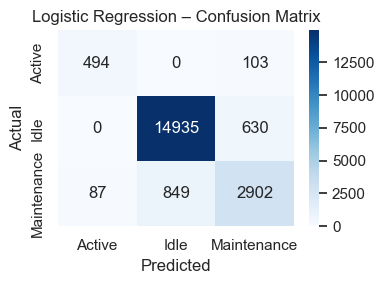

In [ ]:
# 📊 Evaluation
# === 1. Make predictions ==========================================
y_pred = clf.predict(X_test)

# === 2. Core metrics ==============================================
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print(
    "\nClassification Report:\n",
    classification_report(y_test, y_pred, target_names=label_encoder.classes_),
)

# === 3. Confusion-matrix heatmap ==================================

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression – Confusion Matrix")
plt.tight_layout()
plt.show()


### Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance

# Evaluate feature importance using permutation (shuffling)
result = permutation_importance(
    clf,
    X_test,
    y_test,
    n_repeats=10,  # More repeats = more stable results
    random_state=42,
    n_jobs=-1,  # Use all CPU cores
)

# Create a DataFrame of results
importance_df = pd.DataFrame(
    {"Feature": features, "Importances": result.importances_mean}
)

# Sort by importance descending
importance_df.sort_values(by="Importances", ascending=False)


Feature  Importances
9                    Error_Rate_%     0.234895
7   Production_Speed_units_per_hr     0.117720
4              Network_Latency_ms     0.000235
6   Quality_Control_Defect_Rate_%     0.000150
3            Power_Consumption_kW     0.000150
13                           Hour     0.000145
1                   Temperature_C     0.000075
8    Predictive_Maintenance_Score     0.000015
2                    Vibration_Hz     0.000005
10                           Year     0.000000
12                            Day    -0.000055
5                   Packet_Loss_%    -0.000085
0                  Operation_Mode    -0.000180
11                          Month    -0.000440

### Visualize the Feature Importance

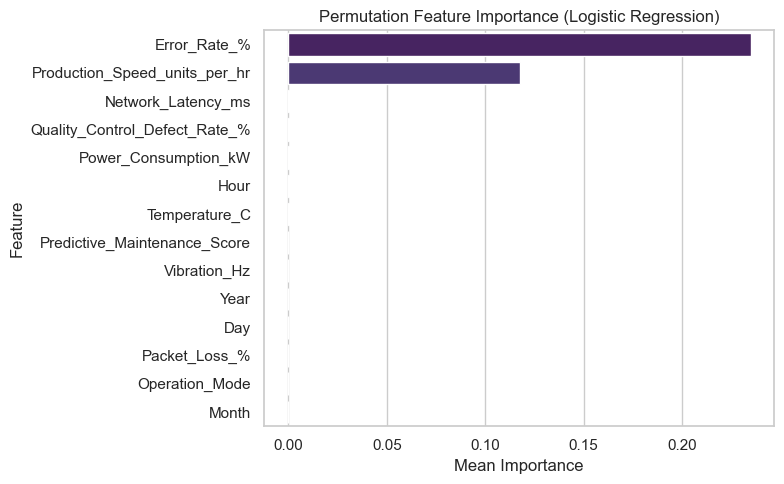

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=importance_df.sort_values(by="Importances", ascending=False),
    x="Importances",
    y="Feature",
    palette="viridis",
)
plt.title("Permutation Feature Importance (Logistic Regression)")
plt.xlabel("Mean Importance")
plt.tight_layout()
plt.show()


### Train Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the model
rf_clf.fit(X_train, y_train)

# 3. Predict on test set
y_pred_rf = rf_clf.predict(X_test)

# 4. Evaluate
print("✅ Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print(
    "\nClassification Report:\n",
    classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_),
)

✅ Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      Active       1.00      1.00      1.00       597
        Idle       1.00      1.00      1.00     15565
 Maintenance       1.00      1.00      1.00      3838

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



#### 📊 Confusion Matrix

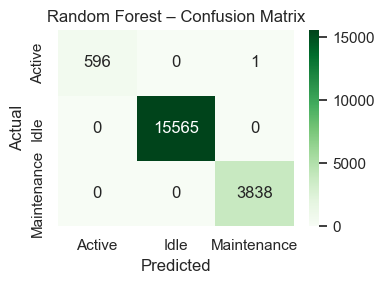

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.title("Random Forest – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


#### Feature Importance (from Random Forest)

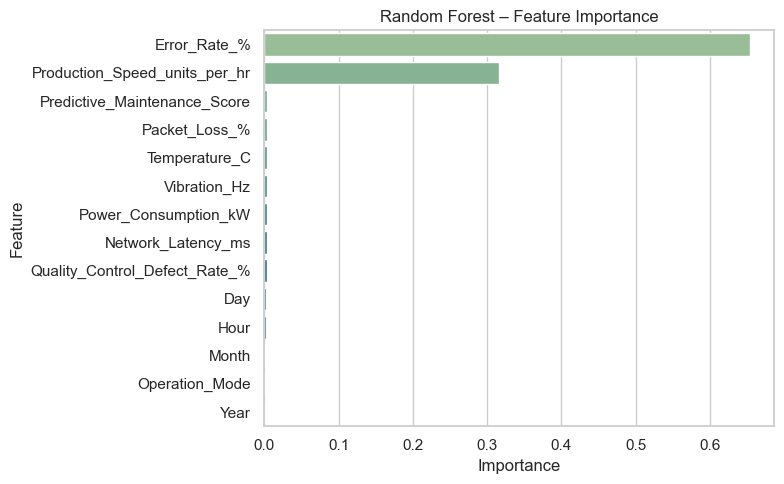

In [ ]:
rf_importance_df = pd.DataFrame(
    {"Feature": features, "Importance": rf_clf.feature_importances_}
).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=rf_importance_df, x="Importance", y="Feature", palette="crest")
plt.title("Random Forest – Feature Importance")
plt.tight_layout()
plt.show()
